*Alba Torres Sánchez 100475093*

*Mª Teresa Cerdán Montaño 100475194*

## Introduction and index

This notebook contain an analysis of two datasets ('mango17-19' and 'mango2020') of a company that imports and exports mangos around the US. Our objective is to verify or not the fulfillment of two hypothesis:

1.   “The prices of the products are greater in 2020 than in 2019”

2.   “The profits for the organic are greater than the non-organic

For conducting the analysis, we will preceed with the following index:


*   Loading datasets
*   Data clearing
*   Hypothesis 1
  * Filtering, segmentation and orderinf of the data
  * Descriptive analysisi
  * Graphic support and patterns found
  * Conclusions
* Hypothesis 2
  * Filtering, segmentation and orderinf of the data
  * Descriptive analysisi
  * Graphic support and patterns found
  * Conclusions



# Loading datasets

We load both datasets, which are csv and json files:

In [83]:
import pandas as pd
#First, we load our cvs file including decimal as "," to properly load the numbers in the format we wish
df_1719 = pd.read_csv("mango17-19.csv", decimal = ",")
#We load the json file in the same way:
df_20 = pd.read_json("mango2020.json")

# Data clearing

Firstly, in order to simplify the analysis of the data, we round to two decimal places:

In [84]:
pd.options.display.float_format = "{:.2f}".format 

We also apply date conversion since the csv files load dates in the wrong notation (as it can be seen in the .dtype, date in df:1719 is in object format):

In [85]:
df_20.dtypes

ID                                 int64
Date                      datetime64[ns]
AveragePrice                     float64
Total Volume                     float64
Type1                            float64
Type2                            float64
Type3                            float64
Type 4                           float64
Small Bags                       float64
Large Bags                       float64
XLarge Bags                      float64
type                              object
year                               int64
region                            object
Profitability per unit           float64
Total profitability              float64
dtype: object

In [86]:
df_1719.dtypes

ID                          int64
Date                       object
AveragePrice              float64
Total Volume              float64
Type1                     float64
Type2                     float64
Type3                     float64
Type 4                    float64
Small Bags                float64
Large Bags                float64
XLarge Bags               float64
type                       object
year                        int64
region                     object
Profitability per unit    float64
Total profitability       float64
dtype: object

In [87]:
df_1719["Date"]= pd.to_datetime(df_1719["Date"],format="%d/%m/%Y")

After changing the date format, we check for the correct type:

In [88]:
df_1719.dtypes

ID                                 int64
Date                      datetime64[ns]
AveragePrice                     float64
Total Volume                     float64
Type1                            float64
Type2                            float64
Type3                            float64
Type 4                           float64
Small Bags                       float64
Large Bags                       float64
XLarge Bags                      float64
type                              object
year                               int64
region                            object
Profitability per unit           float64
Total profitability              float64
dtype: object

Check for NaN values in both dataframes:

In [89]:
check_for_nan_1719 = df_1719.isnull().values.any()
check_for_nan_20 = df_20.isnull().values.any()
print('Existence of NaN values in Mangos1719 Dataset:',check_for_nan_1719 )
print('Existence of NaN values in Mangos20 Dataset:',check_for_nan_20)

Existence of NaN values in Mangos1719 Dataset: False
Existence of NaN values in Mangos20 Dataset: False


There are no missing or null values. 

In the last rows for our 2020 dataset, we can see that the values for "region" are not only states/cities, but they are also defined as "West" or "WestTexNewMexico" - in the latter case since New Mexico and Texas are different states and we do not know what is defined as "West Texas".

In order to see how regions are defined, we assemble the following list of "regions":

In [90]:
#regions array
regions = df_1719.region.unique()
regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)


Looking at the regions, we find that most of them refer to cities, however, there are three states: California, New York, and South Carolina. In addition to metropolitan areas: Great Lakes, Mid-south, Northeast, Northern New England, South-Central, South-east, Plains, West and West Texas and New Mexico.

The issue with such regions is that when comparing, the areas/states would have included the consumption patterns of their cities - which are also presented as separate data. Plus, we cannot be sure of what data they include in such vague descriptions such as "West".

Taking this information into account, we will only use data from cities in order to: (1) prevent using duplicate or uncertain data, and (2) compare regions that are equivalent in size for purposes such as volume or total profitability.

We take out the states and metropolitan areas and only continue with the cities in the dataframes.

In [91]:
nocities = ['California', 'NewYork', 'SouthCarolina', 'GreatLakes','Midsouth', 'Northeast', 'NorthernNewEngland', 'SouthCentral', 'Southeast', 'Plains', 'TotalUS', 'West', 'WestTexNewMexico' ]
df_1719 = df_1719[~df_1719.region.isin(nocities)]
df_20 = df_20[~df_20.region.isin(nocities)]

In order to get a more general view of the data we are working with:

In [92]:
df_1719.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00,13858.00
mean,24.24,1.41,236425.14,80416.22,79699.75,6989.60,69319.19,53018.08,15379.73,921.38,2018.15,1.00,190837.92
std,15.48,0.41,426913.24,201157.08,137796.49,20382.89,144240.67,125880.88,42120.26,3974.05,0.94,0.35,347054.06
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,0.28,84.14
25%,10.00,1.10,8073.01,507.41,1980.33,0.00,3296.68,1609.75,49.61,0.00,2017.00,0.73,8826.08
50%,24.00,1.37,62179.77,4400.10,16143.04,80.54,22514.81,15172.81,1589.82,0.00,2018.00,0.94,51993.89
75%,38.00,1.66,289016.17,76043.85,89233.49,3141.00,78858.14,61719.44,10183.64,43.02,2019.00,1.19,238288.48
max,52.00,3.25,5470227.08,2914047.44,1447533.80,224554.50,2701609.82,2656630.42,706052.84,61316.94,2020.00,2.48,5415392.33


We can see in the "year" column that this dataset also includes data from 2020, hence, it would be interesting to compare the data from both datasets from 2020:

In [93]:
df_1719_20 = df_1719[df_1719["year"] == 2020]
df_1719_20

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
8478,0,2020-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2020,Albany,0.94,139685.73
8479,1,2020-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2020,Albany,0.82,86876.34
8480,2,2020-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2020,Albany,0.71,102700.61
8481,3,2020-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2020,Albany,0.69,96269.21
8482,4,2020-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2020,Albany,0.79,82380.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18208,7,2020-02-04,1.32,7363.56,89.59,440.31,0.00,6833.66,6827.78,5.88,0.00,organic,2020,Tampa,0.86,6332.66
18209,8,2020-01-28,1.61,7695.89,156.01,859.20,0.00,6680.68,5567.39,1113.29,0.00,organic,2020,Tampa,1.00,7734.37
18210,9,2020-01-21,1.52,6871.05,76.66,407.09,0.00,6387.30,6375.55,11.75,0.00,organic,2020,Tampa,0.96,6596.21
18211,10,2020-01-14,1.53,7238.04,106.98,496.61,0.00,6634.45,6634.45,0.00,0.00,organic,2020,Tampa,0.92,6622.81


In [94]:
df_20

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
0,0,2020-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2020,Albany,0.94,139685.73
1,1,2020-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2020,Albany,0.83,86876.34
2,2,2020-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2020,Albany,0.71,102700.61
3,3,2020-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2020,Albany,0.69,96269.21
4,4,2020-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2020,Albany,0.79,82380.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,7,2020-02-04,1.32,7363.56,89.59,440.31,0.00,6833.66,6827.78,5.88,0.00,organic,2020,Tampa,0.86,6332.66
1256,8,2020-01-28,1.61,7695.89,156.01,859.20,0.00,6680.68,5567.39,1113.29,0.00,organic,2020,Tampa,1.00,7734.37
1257,9,2020-01-21,1.52,6871.05,76.66,407.09,0.00,6387.30,6375.55,11.75,0.00,organic,2020,Tampa,0.96,6596.21
1258,10,2020-01-14,1.53,7238.04,106.98,496.61,0.00,6634.45,6634.45,0.00,0.00,organic,2020,Tampa,0.92,6622.81


We can see there are the same number of rows and columns. In addition, the first and last rows are the same, hence, we assume it is duplicate data.

We continue checking for errrors in the 2020 dataframe:

In [95]:
df_20.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00
mean,5.50,3.18,292145.84,96958.13,83523.67,5749.87,105912.91,78024.86,26305.35,1582.70,2020.00,0.84,197083.27
std,3.45,53.07,490712.74,216608.43,153496.65,20037.45,183176.99,155440.94,58386.93,6207.98,0.00,0.18,303298.96
min,0.00,0.56,2064.90,0.00,6.60,0.00,988.45,284.43,0.00,0.00,2020.00,0.43,2054.58
25%,2.75,1.14,13487.26,442.97,2004.42,0.00,8390.53,7168.32,321.43,0.00,2020.00,0.70,13179.76
50%,5.50,1.34,88462.76,8328.53,13836.64,94.97,34752.32,23465.89,4051.44,0.00,2020.00,0.84,68185.85
75%,8.25,1.55,370038.38,90239.24,86939.41,2245.43,128818.65,94396.33,24797.82,405.97,2020.00,0.97,250629.77
max,11.00,1660.00,5070580.56,2532500.54,1235325.42,174975.75,1515825.08,1435807.52,577453.53,56719.10,2020.00,1.32,2611348.99


We can see that the values for the maximum value of the average price and its standard deviation are very high. This is a clear error since the value does not fit in with the others. 

In order to further analyse the data of df_20 we will focus on the 15 first and last rows, as errors are usually concentrated in these:

In [96]:
df_20.head(15)

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
0,0,2020-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2020,Albany,0.94,139685.73
1,1,2020-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2020,Albany,0.83,86876.34
2,2,2020-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2020,Albany,0.71,102700.61
3,3,2020-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2020,Albany,0.69,96269.21
4,4,2020-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2020,Albany,0.79,82380.32
5,5,2020-02-18,1.43,85630.24,5499.73,61661.76,75.00,18393.75,15677.67,2336.08,380.00,conventional,2020,Albany,0.86,74070.16
6,6,2020-02-11,145.00,121804.36,8183.48,95548.47,61.00,18011.41,13264.91,4295.39,451.11,conventional,2020,Albany,0.88,106578.82
7,7,2020-02-04,1.03,216738.47,7625.65,195725.06,143.53,13244.23,10571.60,2422.63,250.00,conventional,2020,Albany,0.67,144131.08
8,8,2020-01-28,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,conventional,2020,Albany,0.94,87539.40
9,9,2020-01-21,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,conventional,2020,Albany,0.90,121000.73


On the sixth row, the average price equals 145, which indicates an error (the value probably is 1.45)

In [97]:
df_20.tail(15)

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
1245,9,2020-01-21,1.27,3159.80,92.12,73.17,0.00,2994.51,2117.69,876.82,0.00,organic,2020,Syracuse,0.83,2638.43
1246,10,2020-01-14,1.25,4343.09,116.19,64.16,0.00,4162.74,1986.09,2176.65,0.00,organic,2020,Syracuse,0.83,3583.05
1247,11,2020-01-07,1.25,4764.47,59.95,133.89,0.00,4570.63,3125.05,1445.58,0.00,organic,2020,Syracuse,0.83,3930.69
1248,0,2020-03-25,1.41,10028.49,138.15,773.22,0.00,9117.12,8208.82,908.30,0.00,organic,2020,Tampa,0.91,9075.78
1249,1,2020-03-18,1.50,10311.24,190.28,901.77,0.00,9219.19,7687.03,1532.16,0.00,organic,2020,Tampa,0.95,9795.68
1250,2,2020-03-11,1.31,8115.07,101.14,392.38,0.00,7621.55,7494.08,127.47,0.00,organic,2020,Tampa,0.85,6938.38
1251,3,2020-03-04,1.51,9851.33,223.68,839.86,0.00,8787.79,7327.76,1460.03,0.00,organic,2020,Tampa,0.96,9408.02
1252,4,2020-02-25,1.37,9144.20,206.39,542.89,0.00,8394.92,7895.92,499.00,0.00,organic,2020,Tampa,0.89,8092.62
1253,5,2020-02-18,1.50,8534.53,131.47,781.00,0.00,7622.06,6452.23,1169.83,0.00,organic,2020,Tampa,0.95,8107.80
1254,6,2020-02-11,1.34,8467.46,40.73,486.03,0.00,7940.70,7499.96,440.74,0.00,organic,2020,Tampa,0.87,7366.69


We can see that the error detected through the maximum value in the describe function (Average Price = 1660), is not within these rows. Hence, in order to check for similar errors, we first compare the average prices of both data sets:

In [98]:
year_descrip_1719 = df_1719[['AveragePrice', 'year']].groupby('year').describe()
year_descrip_1719

AveragePrice                                   
            count mean  std  min  25%  50%  75%  max
year                                                
2017      4264.00 1.38 0.37 0.49 1.08 1.30 1.66 2.79
2018      4264.00 1.34 0.40 0.51 1.04 1.29 1.56 3.25
2019      4346.00 1.52 0.45 0.44 1.21 1.49 1.79 3.17
2020       984.00 1.35 0.31 0.56 1.14 1.34 1.55 2.30

In [99]:
av_20= df_20[['AveragePrice','year']]
year_descrip_20 = av_20.groupby('year').describe()
year_descrip_20

AveragePrice                                       
            count mean   std  min  25%  50%  75%     max
year                                                    
2020       984.00 3.18 53.07 0.56 1.14 1.34 1.55 1660.00

We can observe that the maximum average price for the df_1719 dataset is 3.25. Hence, in order to extract the errors within the df_20 dataset we look for those average prices that exceed what we consider normal values (those that are above 10):

In [100]:
df_20[df_20.AveragePrice > 10]

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
6,6,2020-02-11,145.00,121804.36,8183.48,95548.47,61.00,18011.41,13264.91,4295.39,451.11,conventional,2020,Albany,0.88,106578.82
1080,0,2020-03-25,1660.00,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2020,Portland,1.13,35341.19


There are no more errors in the Average Price of such dataset than those that have been already found. In order to see the correct value of such rows, we search for them, by date and volume, in the df_1719 dataset:

In [101]:
df_1719[(df_1719['Date']== '2020-03-25') & (df_1719['Total Volume']== 31275.39)]

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
18033,0,2020-03-25,1.66,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2020,Portland,1.13,35341.19


In [102]:
df_1719[(df_1719['Date']== '2020-02-11') & (df_1719['Total Volume']== 121804.36)]

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
8484,6,2020-02-11,1.45,121804.36,8183.48,95548.47,61.00,18011.41,13264.91,4295.39,451.11,conventional,2020,Albany,0.88,106578.82


As expected, the values are incorrect in the df_1719 dataset. Hence, we correct this errors:

In [103]:
df_20['AveragePrice'] = df_20['AveragePrice'].replace([145.00, 1660.00],[1.45, 1.66])

In [104]:
df_20[df_20.AveragePrice > 10]

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability


After correcting the errors found, we compare, through the describe function, the data for the year 2020 from both datasets:

In [105]:
df_20.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00
mean,5.50,1.35,292145.84,96958.13,83523.67,5749.87,105912.91,78024.86,26305.35,1582.70,2020.00,0.84,197083.27
std,3.45,0.31,490712.74,216608.43,153496.65,20037.45,183176.99,155440.94,58386.93,6207.98,0.00,0.18,303298.96
min,0.00,0.56,2064.90,0.00,6.60,0.00,988.45,284.43,0.00,0.00,2020.00,0.43,2054.58
25%,2.75,1.14,13487.26,442.97,2004.42,0.00,8390.53,7168.32,321.43,0.00,2020.00,0.70,13179.76
50%,5.50,1.34,88462.76,8328.53,13836.64,94.97,34752.32,23465.89,4051.44,0.00,2020.00,0.84,68185.85
75%,8.25,1.55,370038.38,90239.24,86939.41,2245.43,128818.65,94396.33,24797.82,405.97,2020.00,0.97,250629.77
max,11.00,2.30,5070580.56,2532500.54,1235325.42,174975.75,1515825.08,1435807.52,577453.53,56719.10,2020.00,1.32,2611348.99


In [106]:
df_1719_20.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00,984.00
mean,5.50,1.35,292145.84,96958.13,83523.67,5749.87,105912.91,78024.86,26305.35,1582.70,2020.00,0.84,197083.27
std,3.45,0.31,490712.74,216608.43,153496.65,20037.45,183176.99,155440.94,58386.93,6207.98,0.00,0.18,303298.96
min,0.00,0.56,2064.90,0.00,6.60,0.00,988.45,284.43,0.00,0.00,2020.00,0.43,2054.58
25%,2.75,1.14,13487.26,442.97,2004.42,0.00,8390.53,7168.32,321.43,0.00,2020.00,0.70,13179.76
50%,5.50,1.34,88462.76,8328.53,13836.64,94.97,34752.32,23465.89,4051.44,0.00,2020.00,0.84,68185.85
75%,8.25,1.55,370038.38,90239.24,86939.41,2245.43,128818.65,94396.33,24797.82,405.97,2020.00,0.97,250629.77
max,11.00,2.30,5070580.56,2532500.54,1235325.42,174975.75,1515825.08,1435807.52,577453.53,56719.10,2020.00,1.32,2611348.99


Given that the descriptive values for the 2020 data for both years are the same, that there are the same number of rows/columns, and that the first and last values are the same, we assume that the data is duplicated. Hence, for commodity we will only use data from the df_1719 dataset. 

Lastly, we check for duplicate data within the dataset:

In [107]:
duplicate_rows = df_1719[df_1719.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ID, Date, AveragePrice, Total Volume, Type1, Type2, Type3, Type 4, Small Bags, Large Bags, XLarge Bags, type, year, region, Profitability per unit, Total profitability]
Index: []


# Hypothesis 1

“The prices of the products are greater in 2020 than in 2019”


## **FILTERING, SEGMENTATION AND ORDERING**

First, we need to select the years we wish, the dataset df20 will refer to data from 2020, and the dataset df19 will refer to data from year 2019. 

In [108]:
df19 = df_1719[df_1719["year"] == 2019]

Secondly, in order to conduct our analysis, we simplify the datasets in order to obtain only the necessary data.

In [109]:
df20 = df_1719_20.drop(columns=["ID", "Type1", "Type2", "Type3", "Type 4", "Small Bags", "Large Bags", "XLarge Bags", "type", "Total Volume", "Total profitability"])
df20

,Date,AveragePrice,year,region,Profitability per unit
8478,2020-03-25,1.57,2020,Albany,0.94
8479,2020-03-18,1.35,2020,Albany,0.82
8480,2020-03-11,1.12,2020,Albany,0.71
8481,2020-03-04,1.08,2020,Albany,0.69
8482,2020-02-25,1.28,2020,Albany,0.79
...,...,...,...,...,...
18208,2020-02-04,1.32,2020,Tampa,0.86
18209,2020-01-28,1.61,2020,Tampa,1.00
18210,2020-01-21,1.52,2020,Tampa,0.96
18211,2020-01-14,1.53,2020,Tampa,0.92


In [110]:
df19 = df19.drop(columns=["ID", "Type1", "Type2", "Type3", "Type 4", "Small Bags", "Large Bags", "XLarge Bags", "type", "Total Volume", "Total profitability"])
df19

,Date,AveragePrice,year,region,Profitability per unit
5616,2019-12-31,1.47,2019,Albany,0.79
5617,2019-12-24,1.45,2019,Albany,0.78
5618,2019-12-17,1.43,2019,Albany,0.77
5619,2019-12-10,1.29,2019,Albany,0.69
5620,2019-12-03,1.39,2019,Albany,0.74
...,...,...,...,...,...
17439,2019-01-29,1.43,2019,Tampa,0.92
17440,2019-01-22,1.20,2019,Tampa,0.80
17441,2019-01-15,1.21,2019,Tampa,0.81
17442,2019-01-08,1.21,2019,Tampa,0.81


In order to properly analyse our data, we will compare the average price through months, this requires the creation of a new column.

We will also sort data by ordering the data for months so that we can see compare data more easily when looking at the dataset:

In [111]:
df20["month"] = pd.DatetimeIndex(df20["Date"]).month
df19["month"] = pd.DatetimeIndex(df19["Date"]).month
df20 = df20.sort_values("month")
df19 =  df19.sort_values("month")

We print the new tables:

In [112]:
df19

,Date,AveragePrice,year,region,Profitability per unit,month
8318,2019-01-01,0.93,2019,Tampa,0.52,1
7629,2019-01-01,1.18,2019,RaleighGreensboro,0.64,1
7678,2019-01-29,1.18,2019,RichmondNorfolk,0.74,1
7679,2019-01-22,1.13,2019,RichmondNorfolk,0.61,1
7680,2019-01-15,1.15,2019,RichmondNorfolk,0.72,1
...,...,...,...,...,...,...
15381,2019-12-03,1.79,2019,Denver,1.09,12
15430,2019-12-31,1.05,2019,Detroit,0.72,12
15431,2019-12-24,1.37,2019,Detroit,0.89,12
15326,2019-12-17,1.41,2019,DallasFtWorth,0.91,12


In [113]:
df20

,Date,AveragePrice,year,region,Profitability per unit,month
9089,2020-01-07,1.20,2020,Tampa,0.75,1
17623,2020-01-14,1.56,2020,Atlanta,0.98,1
17622,2020-01-21,1.64,2020,Atlanta,1.02,1
17621,2020-01-28,1.67,2020,Atlanta,1.03,1
17612,2020-01-07,1.54,2020,Albany,0.97,1
...,...,...,...,...,...,...
17688,2020-03-04,1.88,2020,Charlotte,1.14,3
17687,2020-03-11,1.73,2020,Charlotte,1.06,3
17686,2020-03-18,1.75,2020,Charlotte,1.07,3
17745,2020-03-25,1.60,2020,Denver,1.00,3


In [114]:
month_20 = df20.month.unique()
l_month_20 = month_20.tolist()

month_19 = df19.month.unique()
l_month_19 = month_19.tolist()

print("We have data for months " + str(l_month_19) + " of 2019, and for months " + str(l_month_20) + " of 2020.")

We have data for months [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] of 2019, and for months [1, 2, 3] of 2020.


Since we only have available data for the first three months of 2020 we will focus on the comparison of average prices in these months. For this we drop the rows for months after March:

In [115]:
df19 = df19[df19.month < 4]

As we will use profitability per unit to make an inference about the changes in average price, we add a new column for "Cost per unit" in orer to facilitate the analysis:

In [116]:
df20["Cost per unit"] = (df20["AveragePrice"] - df20["Profitability per unit"])
df20

,Date,AveragePrice,year,region,Profitability per unit,month,Cost per unit
9089,2020-01-07,1.20,2020,Tampa,0.75,1,0.45
17623,2020-01-14,1.56,2020,Atlanta,0.98,1,0.58
17622,2020-01-21,1.64,2020,Atlanta,1.02,1,0.62
17621,2020-01-28,1.67,2020,Atlanta,1.03,1,0.64
17612,2020-01-07,1.54,2020,Albany,0.97,1,0.57
...,...,...,...,...,...,...,...
17688,2020-03-04,1.88,2020,Charlotte,1.14,3,0.74
17687,2020-03-11,1.73,2020,Charlotte,1.06,3,0.67
17686,2020-03-18,1.75,2020,Charlotte,1.07,3,0.68
17745,2020-03-25,1.60,2020,Denver,1.00,3,0.60


In [117]:
df19["Cost per unit"] =(df19["AveragePrice"] - df19["Profitability per unit"])
df19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,AveragePrice,year,region,Profitability per unit,month,Cost per unit
8318,2019-01-01,0.93,2019,Tampa,0.52,1,0.42
7629,2019-01-01,1.18,2019,RaleighGreensboro,0.64,1,0.54
7678,2019-01-29,1.18,2019,RichmondNorfolk,0.74,1,0.44
7679,2019-01-22,1.13,2019,RichmondNorfolk,0.61,1,0.51
7680,2019-01-15,1.15,2019,RichmondNorfolk,0.72,1,0.42
...,...,...,...,...,...,...,...
6557,2019-03-26,1.58,2019,HartfordSpringfield,0.94,3,0.64
6558,2019-03-19,1.66,2019,HartfordSpringfield,0.88,3,0.78
6559,2019-03-12,1.65,2019,HartfordSpringfield,0.88,3,0.77
16000,2019-03-26,0.74,2019,Louisville,0.57,3,0.17


To facilitate the use of the data, we first rename columns so that the format is consistent and the names are representative and easy to use:

In [118]:
df20 = df20.rename(columns={"AveragePrice":"Average Price", "region":"US City", "year":"Year", "month":"Month"})
df19 = df19.rename(columns={"AveragePrice":"Average Price", "region":"US City", "year":"Year", "month":"Month"})


We also organize such columns for an easy access to the data:

We do this first by printing a list of the columns (in order to properly see what we want to change) and then, creating a new list with the ordered coolumns. 

In [119]:
df20.columns.tolist()

['Date',
 'Average Price',
 'Year',
 'US City',
 'Profitability per unit',
 'Month',
 'Cost per unit']

In [120]:
new_col_list = ["Average Price", "Month", "Year", "Date", "US City", "Profitability per unit", "Cost per unit"]
df20 = df20[new_col_list]
df20

,Average Price,Month,Year,Date,US City,Profitability per unit,Cost per unit
9089,1.20,1,2020,2020-01-07,Tampa,0.75,0.45
17623,1.56,1,2020,2020-01-14,Atlanta,0.98,0.58
17622,1.64,1,2020,2020-01-21,Atlanta,1.02,0.62
17621,1.67,1,2020,2020-01-28,Atlanta,1.03,0.64
17612,1.54,1,2020,2020-01-07,Albany,0.97,0.57
...,...,...,...,...,...,...,...
17688,1.88,3,2020,2020-03-04,Charlotte,1.14,0.74
17687,1.73,3,2020,2020-03-11,Charlotte,1.06,0.67
17686,1.75,3,2020,2020-03-18,Charlotte,1.07,0.68
17745,1.60,3,2020,2020-03-25,Denver,1.00,0.60


In [121]:
df19 = df19[new_col_list]
df19

,Average Price,Month,Year,Date,US City,Profitability per unit,Cost per unit
8318,0.93,1,2019,2019-01-01,Tampa,0.52,0.42
7629,1.18,1,2019,2019-01-01,RaleighGreensboro,0.64,0.54
7678,1.18,1,2019,2019-01-29,RichmondNorfolk,0.74,0.44
7679,1.13,1,2019,2019-01-22,RichmondNorfolk,0.61,0.51
7680,1.15,1,2019,2019-01-15,RichmondNorfolk,0.72,0.42
...,...,...,...,...,...,...,...
6557,1.58,3,2019,2019-03-26,HartfordSpringfield,0.94,0.64
6558,1.66,3,2019,2019-03-19,HartfordSpringfield,0.88,0.78
6559,1.65,3,2019,2019-03-12,HartfordSpringfield,0.88,0.77
16000,0.74,3,2019,2019-03-26,Louisville,0.57,0.17


## **DESCRIPTIVE ANALYSIS**

In order to conduct a descriptive analysis, we use the describe function to get measures of frequency, central tendency, dispersion... 

In [122]:
df19.describe()

,Average Price,Month,Year,Profitability per unit,Cost per unit
count,1066.00,1066.00,1066.00,1066.00,1066.00
mean,1.30,1.92,2019.00,0.80,0.50
std,0.44,0.83,0.00,0.24,0.22
min,0.44,1.00,2019.00,0.30,0.02
25%,0.97,1.00,2019.00,0.62,0.33
50%,1.26,2.00,2019.00,0.78,0.48
75%,1.57,3.00,2019.00,0.95,0.64
max,3.05,3.00,2019.00,1.73,1.32


In [123]:
df20.describe()

,Average Price,Month,Year,Profitability per unit,Cost per unit
count,984.00,984.00,984.00,984.00,984.00
mean,1.35,2.00,2020.00,0.84,0.51
std,0.31,0.82,0.00,0.18,0.14
min,0.56,1.00,2020.00,0.43,0.13
25%,1.14,1.00,2020.00,0.70,0.41
50%,1.34,2.00,2020.00,0.84,0.51
75%,1.55,3.00,2020.00,0.97,0.60
max,2.30,3.00,2020.00,1.32,1.00


**Comparing Average Price** in both datasets, we can observe that the maximum for 2020 (1.35) is higher than for 2019 (1.30). Similarly, the minimum is higher in 2020 (0.56) than in 2019 (0.44). As well as the maximum (3.05 in 2019 vs 2.30 in 2020).

Comparing the standard deviation, we have a higher value for 2019 (0.44) than in 2020 (0.31), which shows that data is more dispersed. This could be because prices vary more, or due to outliers - which will be seen graphically. 

So, **although data in 2019 set is more disperse, it should be overall lower for most values**.

We also note that sample sizes are similar and large enough to consider the comparison accurate. 

In order to analyse the reasoning behind the change in average prices, we will use profitability and cost per unit. The general descriptive measures show that the mean **costs per unit were the same for both years**. However, **profitability per unit was higher in 2020**. This would mean that the reason for higher profits cannot be linked to inflation or increasing costs, but is entirely due to increases in the marginal profits. 

However, the 25% and 75% quantiles for costs per unit are not the same for both years. This difference in the distribution of costs could be due to different costs per month/region. This will be further looked into in the graphic analysis. 

**OUTLIERS:**

In order to analyse the variability of the data, we are going to find the outliers of each year. Therefore, we establish a function that detects outliers using the interquantile range (IQR):

In [124]:
def find_outliers_IQR(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [125]:
outliers19 = find_outliers_IQR(df19['Average Price'])
print("number of outliers: "+ str(len(outliers19)))
outliers19

number of outliers: 18


17015   2.70
17017   2.70
17018   2.58
17019   2.54
17013   2.59
17012   2.58
17011   2.52
15684   2.57
17007   2.83
17010   2.92
17009   2.90
17008   2.88
15682   2.48
17433   2.56
16904   2.50
17434   2.61
16054   2.59
16055   3.05
Name: Average Price, dtype: float64

In [126]:
outliers_df19 = df19.loc[df19['Average Price'] >= 2.48].sort_values(by=['Average Price'])
outliers_df19

,Average Price,Month,Year,Date,US City,Profitability per unit,Cost per unit
15682,2.48,3,2019,2019-03-26,HartfordSpringfield,1.44,1.04
16904,2.50,3,2019,2019-03-05,Sacramento,1.40,1.10
17011,2.52,2,2019,2019-02-26,SanFrancisco,1.41,1.11
17019,2.54,1,2019,2019-01-01,SanFrancisco,1.42,1.12
17433,2.56,3,2019,2019-03-12,Tampa,1.48,1.08
15684,2.57,3,2019,2019-03-12,HartfordSpringfield,1.44,1.13
17018,2.58,1,2019,2019-01-08,SanFrancisco,1.49,1.09
17012,2.58,2,2019,2019-02-19,SanFrancisco,1.44,1.14
17013,2.59,2,2019,2019-02-12,SanFrancisco,1.45,1.14
16054,2.59,3,2019,2019-03-19,MiamiFtLauderdale,1.45,1.14


In [127]:
outliers20 = find_outliers_IQR(df20['Average Price'])
print("number of outliers: "+ str(len(outliers20)))
outliers20

number of outliers: 6


18116   2.30
18113   2.27
18092   2.18
18052   2.25
18110   2.25
18111   2.22
Name: Average Price, dtype: float64

In [128]:
outliers_df20 = df20.loc[df20['Average Price'] >= 2.18].sort_values(by=['Average Price'])
outliers_df20

,Average Price,Month,Year,Date,US City,Profitability per unit,Cost per unit
18092,2.18,1,2020,2020-01-07,Sacramento,1.24,0.94
18111,2.22,2,2020,2020-02-11,SanFrancisco,1.26,0.96
18052,2.25,2,2020,2020-02-04,RaleighGreensboro,1.32,0.93
18110,2.25,2,2020,2020-02-18,SanFrancisco,1.32,0.93
18113,2.27,1,2020,2020-01-28,SanFrancisco,1.28,0.99
18116,2.30,1,2020,2020-01-07,SanFrancisco,1.30,1.00


We can see that in 2019 there are 18 outliers, three times the outliers in 2020 (6). As well, the minimum and maximum outlier in 2019 are higher than in its correspondent in 2020. This explains the higher standard deviation in 2019 (0.44) than in 2020 (0.31).

Not only we can see how many outliers are but also which month and cities contains more. In 2019, 11/18 outliers are from month 3 (March) and the city with more outliers is San Francsico (11). In 2020, no outliers are visible in March and 

## **GRAPHIC SUPPORT**

First, we import the libraries we want to use to make our graphs:

In [129]:
import matplotlib as plt
import seaborn as sns

For the graphic comparison of both years, many of the plots required a dataframe that contains all the information. Therefore, we concatenate both df_19 and df_20 in one dataframe, df_total:

In [130]:
df_total = pd.concat((df19,df20),join="outer", sort="True")

In order to see visually the correlations, we assemble a heatmap with the variables:

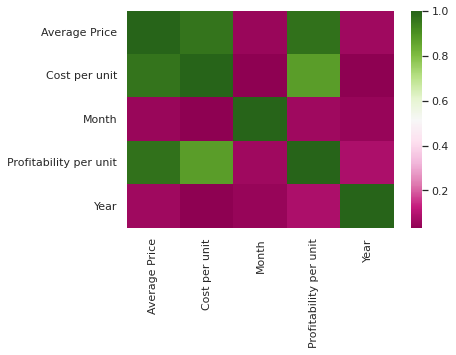

In [131]:
sns.set(rc={'figure.figsize':(6,4)})
sns.heatmap(df_total.corr(),cmap='PiYG');

**VIOLIN PLOT:**

The first graph we make is a violin plot: 

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It depicts summary statistics as well as the density of each variable.

The white dot represents the median, the thick gray bar in the center represents the interquartile range and the thin gray line the rest of the distribution (except the outliers).

The wider sections of the violin represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.



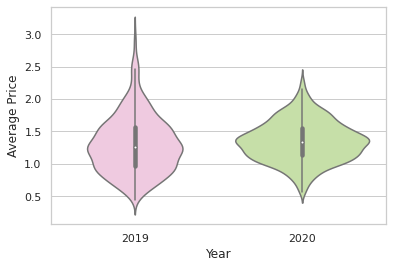

In [132]:
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="Year", y="Average Price", palette = 'PiYG', data = df_total)

In this case, **data from 2019 is more scattered than 2020** (also seen in the higher value of the standard deviation, 0.44 > 0.31). The shape of the distribution (wide in the middle and extremely skinny on each end) indicates that the average price in both years are highly concentraded around the median (more concentration in 2020). Overall, average prices seem quite similar, we will look into it with more detail for conclusions.

**AVERAGE PRICE THROUGH THE MONTHS - BOX PLOT:**

Box plots are very useful for comparing diferent groups because they show outliers, skewness, spread and distribution in a single plot. This is helpful to complement the violin plots to better see outliers. 

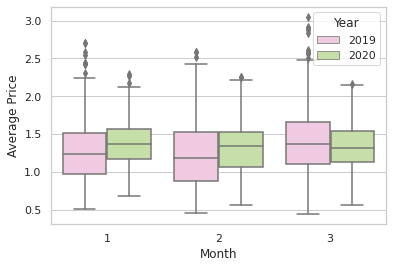

In [133]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="Month", y="Average Price",
            hue="Year", palette='PiYG',
            data=df_total)

The edges of the boxes are the 25th and 75th percentiles of the distribution of the average price. We can see that in January and February in both years, the 75% percentiles are really similar.  This means that 75% of the average prices on JaNuary and February (on both years) were around 1.5 euros.

However, as also seen in the violin plot, data from 2019 is more scattered which is why the 25th percentile does not coincide (lower for 2019). This is also represented by longer whiskers for 2019 data, meaning the average prices covered a wider set of values. 

Comapring the median, there are lower values for 2019 for January and February, but in March the median of 2019 is slightly higher than that of 2020. This seems to be due to a higher value in March 2019 (comparing with the other months) and a slight fall in average prices in March 2020. 

The outliers are represented by the dots above the whisker. As proven before with the outliers fucntion, there are more outliers in 2019 than in 2020.These are above the boxplot, meaning, that some values are exceptionally high in comparison with the mean average prices. March 2019 contains more outliers than any other month, and it could explain the higher average price in that month compare to March 2020 (which does not contain any outlier and the data available is smaller).  In our analysis by US cities, we´ll see if these outliers are due to changes in prices by regions, or simply puntual anomalies. 

There is no significant skewness in any distribution - the distribution is fairly symmetrical. 

**AVERAGE PRICE THROUGH THE MONTHS - LINEPLOT:**

As we saw  on the boxplot, the values for January and February were lower for 2019, but higher in March 2019. In order to see this data more clearly, we have assembled a lineplot:

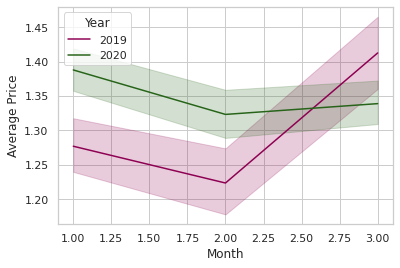

In [134]:
sns.lineplot(x="Month", y="Average Price", hue="Year",palette = "PiYG",  data=df_total, linewidth=1.5)

Analysing the graph, we can see a drop in prices in February - however it is in both years, so the prices are still higher in 2020. But in March 2019 prices grew considerably, while in 2020 they stayed more or less the same. 

This data is somewhat inconclusive due to the small amount of data we can compare. On average, prices in 2020 were higher than in 2019. However, if an analysis could be done of the following months, the trends of both years could change the results - if 2019's prices continue to grow and 2020's stagnate, the average prices of the whole year could make prices in 2019 higher. Hence, although the data points to one conclusion, t**he limitations of the data should be noted**.

**CITIES AND AVERAGE PRICE VARIABILITY - POINT PLOT**

For the comparion by regions of the average price in both years, we decide it to use a point plot. Point plots represent an estimate of the mean by the position of the dot and provides some indication of the unceertaity around the estimate using error bars.

For better understanding, the average mean of 2019 will be sort. We group the data by city and then describe it to obtain the mean average price of each city. Then, we obtain a list with correct order of cities which we apply to the column 'US City' of the total dataframe

In [135]:
dfcities19 = df19.groupby('US City')['Average Price'].describe().sort_values('mean')
dfcities19.index.tolist

<bound method IndexOpsMixin.tolist of Index(['Houston', 'CincinnatiDayton', 'Nashville', 'DallasFtWorth', 'Portland',
       'LosAngeles', 'PhoenixTucson', 'Louisville', 'Detroit', 'LasVegas',
       'Columbus', 'Denver', 'Boise', 'Seattle', 'Roanoke', 'Atlanta',
       'Indianapolis', 'Spokane', 'NewOrleansMobile', 'StLouis',
       'RichmondNorfolk', 'SanDiego', 'Pittsburgh', 'Jacksonville',
       'RaleighGreensboro', 'Orlando', 'Chicago', 'GrandRapids', 'Tampa',
       'Charlotte', 'MiamiFtLauderdale', 'HarrisburgScranton', 'Boston',
       'Syracuse', 'Albany', 'BuffaloRochester', 'BaltimoreWashington',
       'Philadelphia', 'Sacramento', 'HartfordSpringfield', 'SanFrancisco'],
      dtype='object', name='US City')>

In [136]:
sorter = ['Houston', 'CincinnatiDayton', 'Nashville', 'DallasFtWorth', 'Portland', 'LosAngeles', 'PhoenixTucson', 'Louisville', 'Detroit', 'LasVegas',
       'Columbus', 'Denver', 'Boise', 'Seattle', 'Roanoke', 'Atlanta','Indianapolis', 'Spokane', 'NewOrleansMobile', 'StLouis',
       'RichmondNorfolk', 'SanDiego', 'Pittsburgh', 'Jacksonville', 'RaleighGreensboro', 'Orlando', 'Chicago', 'GrandRapids', 'Tampa',
       'Charlotte', 'MiamiFtLauderdale', 'HarrisburgScranton', 'Boston', 'Syracuse', 'Albany', 'BuffaloRochester', 'BaltimoreWashington',
       'Philadelphia', 'Sacramento', 'HartfordSpringfield', 'SanFrancisco']

In [137]:
df_total['US City'] = df_total['US City'].astype('category').cat.set_categories(sorter)
df_total= df_total.sort_values(['US City'])

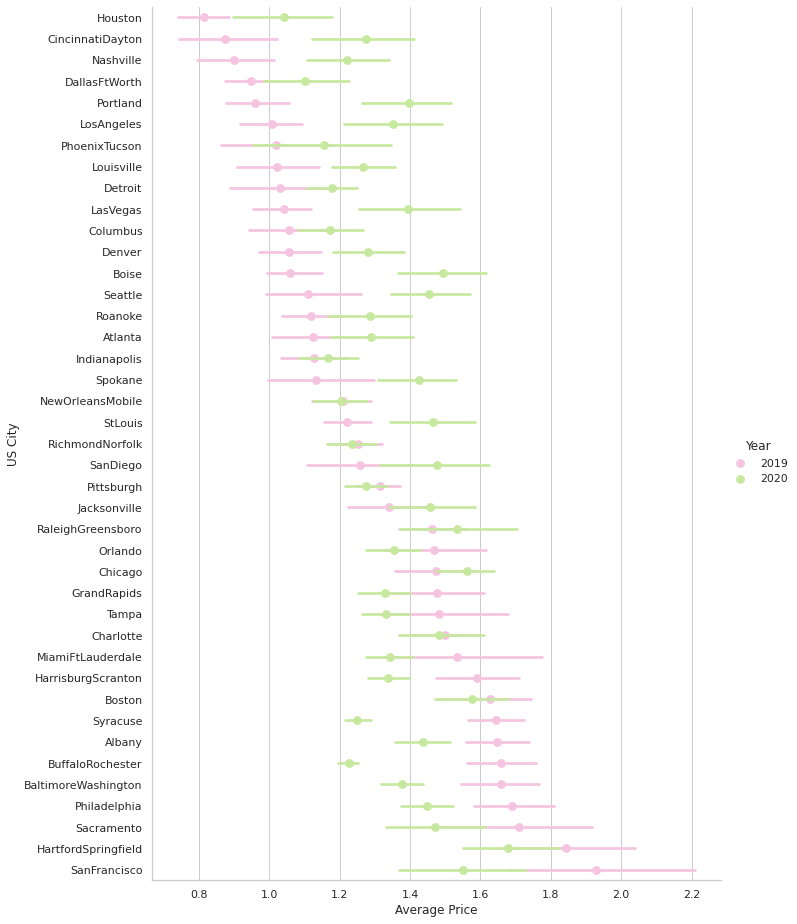

In [138]:
sns.set(style= 'whitegrid')
sns.catplot(kind="point", x="Average Price", y="US City", data = df_total, hue = "Year", height=13, aspect=0.8, palette="PiYG", join=False)

We can see that for the lower average prices in 2019, prices in 2020 are higher. This equals to 23 cities with higher prices in 2020. The other 18 cities present higher prices in 2019, it should be noted that some of these cities are outliers of 2019, as we have seen in the descriptive analysis (San Francisco, Hartford-Springfield, Sacramento, MiamiFtLauderdale and Tampa). In these cities, the error bar is quite large in 2019 (and in some cases 2020), which indicates the high variability of the data in 2019 and how may be alter by the outliers.

**PROFITABILITY, COSTS AND AVERAGE PRICE:**

We will use a pairplot to analyse the relationships between the variables we consider: average price, profitability per unit, and cost per unit:

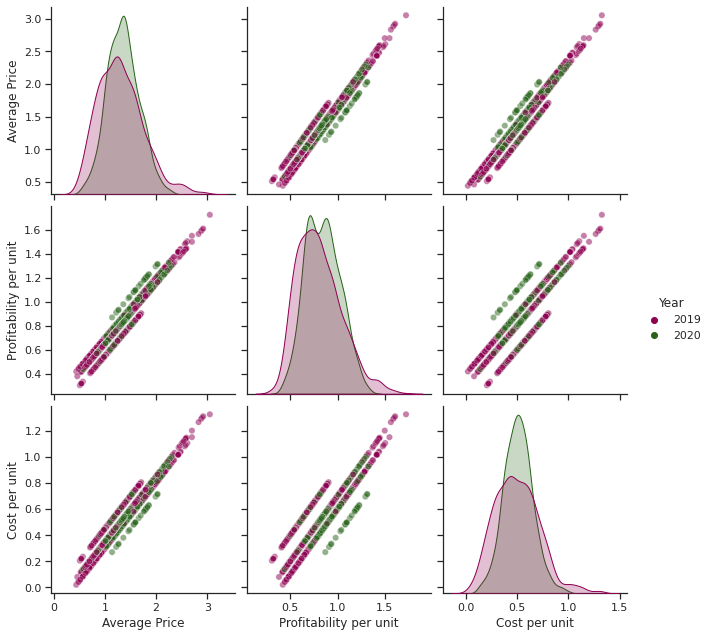

In [139]:
sns.set(style="ticks", color_codes=True)
df_plot = df_total[["Average Price", "Profitability per unit", "Cost per unit",  "Year"]] 
sns.pairplot(df_plot, vars=df_plot.columns[:-1], hue="Year", palette="PiYG", plot_kws = {'alpha': 0.5, 's': 40}, height=3)


Firstly, we analyse the graphs on the diagonal line which show the distribution of each variable. The three variables are slightly skewed to the left, which is due to outliers above the mean values. 
- Average price is overall higher in 2020
- Profitability per unit is also higher in 2020 (mean is to the right). 
- Costs per unit vary mainly due to their distribution. In 2019 the values of costs are more dispersed. They reach higher and lower values than in 2020. Comparing the concentration points for both years, costs are slightly higher in 2020, however, the difference is less than in profitability. 


We can note that the prices in 2019 reach higher values, which can be due to the outliers seen previously and the differences between regions.

Looking at the comparison between average price and the other values (first row), we can observe a higher density of 2019 values for profitability per unit in lower values. In addition to a lower values of cost per unit however, the difference is smaller than the one found in profitability. Specially, due to the larger distribution of values for costs in 2019.  

This means that the **increase in average prices from 2019 to 2020 is mostly due to an increase in profitability per unit, rather than an increase in costs**. Although costs have a slight (although not as significant) impact.


## **CONCLUSIONS**

Overall, we can conclude that the hypothesis **"the price of the products are greater in 2020 than in 2019" fulfills**. 

In order to carry out the analysis, we have taken into account the progression of the avergae prices through the first three months of each year (as 2020 data is limited) and the variability of prices in each city in both years.

The variability, outliers and extra-data that appears in the 2019 information, causes that in some cities the average price is higher in 2019 and also in the month of March 2019. However, if we take into consideration that data is more concentrated in 2020 and consequently, reflects better the situation of prices in the US, 2020 average prices are greater than in 2019.



# Hypothesis 2

“The profits for the organic are greater than the non-organic”.

We will look into the total profitability of both types of products and its profitability per unit, as well as the variables that may interfere in the result.

## FILTERING, SEGMENTATION AND ORDERING:

First, we drop data that is not relevant for the conventional and organic mangos analysis:

In [140]:
df_h2 = df_1719.drop(columns=["ID","Date" ,"Type1", "Type2", "Type3", "Type 4", "Small Bags", "Large Bags", "XLarge Bags", "region"])
df_h2

,AveragePrice,Total Volume,type,year,Profitability per unit,Total profitability
0,1.33,64236.62,conventional,2017,0.71,45929.18
1,1.35,54876.98,conventional,2017,0.72,39785.81
2,0.93,118220.22,conventional,2017,0.52,60883.41
3,1.08,78992.15,conventional,2017,0.59,46605.37
4,1.28,51039.60,conventional,2017,0.69,35217.32
...,...,...,...,...,...,...
18208,1.32,7363.56,organic,2020,0.86,6332.66
18209,1.61,7695.89,organic,2020,1.00,7734.37
18210,1.52,6871.05,organic,2020,0.96,6596.21
18211,1.53,7238.04,organic,2020,0.92,6622.81


We rename some of the columns for consistency:

In [141]:
df_h2 = df_h2.rename(columns={"type":"Type", "year":"Year", 'AveragePrice': 'Average Price'})

And order the columns for easier access and analysis of the data:

In [142]:
new_col_list2 = ["Type", "Total profitability", "Total Volume", "Profitability per unit",'Average Price', "Year"]
df_h2 = df_h2[new_col_list2]

The tables we we'll use for the comparison are df_organic for organic products and df_conventional for non-organic products:

In [143]:
df_organic = df_h2[df_h2["Type"]== "organic"]
df_conventional = df_h2[df_h2["Type"]== "conventional"]

The selection of our variables is for the following analysis: (1) in order to see whether total profitability for the different types of products varies through the years, and (2) to analyse the difference in profitability due to volume. We expect the most profitable product to be the one where total volume of sales is larger. However, we include profitability per unit in order to see whether (3) the profitability per unit of a type of product is significantly larger enough to impact the total profits of the product regardless of volume. 

The Pearson coefficients in the table below enable us to know between which values we expect to find a strong correlation: it seems as though total profitability and total volume are very strongly correlated, while profitability per unit does not seem to have a correlation with total profitability. The average price of the product seems to have a strong correlation with the profitability per unit but a negative correlation with the total profitability.

In [144]:
df_organic.corr(method="pearson")

,Total profitability,Total Volume,Profitability per unit,Average Price,Year
Total profitability,1.00,0.93,0.12,-0.07,0.19
Total Volume,0.93,1.00,-0.13,-0.24,0.19
Profitability per unit,0.12,-0.13,1.00,0.66,-0.04
Average Price,-0.07,-0.24,0.66,1.00,0.04
Year,0.19,0.19,-0.04,0.04,1.00


In [145]:
df_conventional.corr(method="pearson")

,Total profitability,Total Volume,Profitability per unit,Average Price,Year
Total profitability,1.00,0.88,0.23,-0.13,0.06
Total Volume,0.88,1.00,-0.11,-0.33,0.06
Profitability per unit,0.23,-0.11,1.00,0.51,0.08
Average Price,-0.13,-0.33,0.51,1.00,0.25
Year,0.06,0.06,0.08,0.25,1.00


## DESCRIPTIVE ANALYSIS:


As in the first hypothesis, in order to conduct a descriptive analysis, we use the describe function to get measures of frequency, central tendency, dispersion...

In [146]:
df_organic.describe()

,Total profitability,Total Volume,Profitability per unit,Average Price,Year
count,6929.00,6929.00,6929.00,6929.00,6929.00
mean,14976.69,13554.84,1.16,1.65,2018.15
std,18659.22,17439.76,0.33,0.38,0.94
min,84.14,84.56,0.42,0.44,2017.00
25%,4205.10,3778.51,0.94,1.41,2017.00
50%,8824.72,8071.93,1.07,1.62,2018.00
75%,18438.77,16110.05,1.30,1.87,2019.00
max,242150.03,229646.05,2.48,3.25,2020.00


In [147]:
df_conventional.describe()

,Total profitability,Total Volume,Profitability per unit,Average Price,Year
count,6929.00,6929.00,6929.00,6929.00,6929.00
mean,366699.15,459295.44,0.83,1.17,2018.15
std,422728.03,514660.38,0.30,0.27,0.94
min,23696.81,33699.68,0.28,0.46,2017.00
25%,124433.81,159970.54,0.63,0.98,2017.00
50%,238127.63,289052.93,0.75,1.14,2018.00
75%,462690.31,581023.47,0.94,1.33,2019.00
max,5415392.33,5470227.08,1.93,2.22,2020.00


Firstly, we note that the sample sizes are the same, making the comparison fair.

Looking at the descriptive values for both types of products, total profitability has a **higher mean for non-organic (conventional) products**. 

The standard deviation is high in both types of product. In fact, the standard deviation is higher than the mean. This entails a high variation between values. Generally, this occurs when data is not normally distributed. Because we have no reason to believe that data should be normally distributed, the standard deviation is not a great value for such analysis. 

Since, the standard deviation does not seem like the proper measure, perhaps the mean is also not very representative since they are usually better for normally distributed data. Hence, we will take more into consideration the median and range. 

The **median total profitability is higher for non-organic products** rather than organic ones. This can be explained through volume, since the **mean and median of volume are much higher for non-organic products**. 

The range of total profitability is higher in non-organic products (range in non-organic is 5,391,695.52 while in organic products it has a value of 242,065.89), however, the values are also significantly higher. Hence, we also take the range as a proportion and find that they are both similar and very high values. This reiterates that data is dispersed for both types. 

The interquartile range seems as a more accurate description of the real values of profitability. These are not as extreme as the total range, hence, we expect that there are a great number of outliers.  As with the range, both types have similarly proportional IQR. Values are significantly higher for non-organic products in the 25th and 75th.

**OUTLIERS:**

Since there is a significant variability between data, we search for outliers in order to see how much of the variability falls within an accurate description of the variables, and which data are anomalies.

The function to detect outliers was already described in the first hypothesis, so we simply apply it:

In [148]:
outliers_organic = find_outliers_IQR(df_organic["Total profitability"])
print("number of outliers: "+ str(len(outliers_organic)))
outliers_organic

number of outliers: 512


9555     40965.32
9556     44443.13
9557     46592.84
9558     48199.00
9574     41665.77
           ...   
18124   108453.81
18125    46604.46
18126    44522.55
18127    47640.41
18128    91851.66
Name: Total profitability, Length: 512, dtype: float64

In [149]:
outliers_conventional = find_outliers_IQR(df_conventional["Total profitability"])
print("number of outliers: "+ str(len(outliers_conventional)))
outliers_conventional

number of outliers: 377


119    1197866.72
120    1186017.64
134    1371560.85
135    1308473.04
136    1174417.98
          ...    
8750   1996665.40
8751   1923441.84
8752   1903236.08
8753   1826323.81
8989    972563.10
Name: Total profitability, Length: 377, dtype: float64

We find a significant number of outliers in both datasets: for organic products we find 512 outliers, and 377 outliers for non-organic products. As these are a considerable amount, and we have seen by comparing the range and interquantile range that they may alter the data we want to assess in a negative way, we will not take them into account when analysing data graphically. 

For further analysis, we see if there is any significant **change in profitability between years**:

In [150]:
year_descrip_conventional = df_conventional.groupby("Year")
year_descrip_conventional.describe()

Total profitability                                                   \
                   count      mean       std      min       25%       50%   
Year                                                                        
2017             2132.00 326174.44 405602.10 23696.81 105631.69 206738.79   
2018             2132.00 374354.97 436863.37 26162.41 121606.58 244724.39   
2019             2173.00 397210.51 437527.56 31136.00 143595.06 265589.53   
2020              492.00 374372.46 347478.02 45154.40 145811.16 250652.82   

                          Total Volume            ... Profitability per unit  \
           75%        max        count      mean  ...                    75%   
Year                                              ...                          
2017 397784.79 4979298.14      2132.00 423418.85  ...                   0.84   
2018 465275.30 4612203.54      2132.00 467776.07  ...                   0.95   
2019 513286.58 5415392.33      2173.00 462434.27  ...                   1.03   
2020 501573.90 2611348.99       492.00 564148.07  ...                   0.77   

          Average Price                                     
      max         count mean  std  min  25%  50%  75%  max  
Year                                                        
2017 1.63       2132.00 1.09 0.17 0.49 0.98 1.09 1.21 1.59  
2018 1.75       2132.00 1.11 0.26 0.51 0.92 1.09 1.27 2.20  
2019 1.93       2173.00 1.30 0.31 0.46 1.08 1.31 1.53 2.22  
2020 1.02        492.00 1.13 0.21 0.56 1.01 1.14 1.28 1.74  

[4 rows x 32 columns]

In [151]:
year_descrip_organic = df_organic.groupby("Year")
year_descrip_organic.describe()

Total profitability                                                      \
                   count     mean      std     min     25%      50%      75%   
Year                                                                           
2017             2132.00 10306.97 13092.47   84.14 2832.09  5427.42 11269.81   
2018             2132.00 14826.93 19139.66  362.42 4331.44  9020.12 17342.10   
2019             2173.00 18614.50 21082.67  713.35 6272.85 11876.32 22656.18   
2020              492.00 19794.08 20879.45 2054.58 7423.55 13156.55 24840.64   

               Total Volume           ... Profitability per unit       \
           max        count     mean  ...                    75%  max   
Year                                  ...                               
2017 196985.35      2132.00  9266.93  ...                   1.28 2.25   
2018 242150.03      2132.00 13637.13  ...                   1.32 2.31   
2019 213789.13      2173.00 16189.31  ...                   1.40 2.48   
2020 146352.89       492.00 20143.61  ...                   1.06 1.32   

     Average Price                                     
             count mean  std  min  25%  50%  75%  max  
Year                                                   
2017       2132.00 1.66 0.29 0.81 1.47 1.66 1.85 2.79  
2018       2132.00 1.57 0.39 0.58 1.32 1.52 1.79 3.25  
2019       2173.00 1.75 0.46 0.44 1.44 1.72 2.04 3.17  
2020        492.00 1.57 0.24 1.01 1.39 1.54 1.73 2.30  

[4 rows x 32 columns]

For non-organic products we see there is no trend applicable to either total profitability, total volume, or profitability per unit. Data is pretty consistent throughout the years. 

For organic products, however, total profitability does increase progressively over the years. This is due to a gradual increase in total volume of sales. Regarding profitability per unit, it varies depending on the year but it does not follow any trend. The biggest change in this variable was from 2019 to 2020 (profitability per unit dropped 19%), but it is otherwise pretty consistent. 

This drop, somewhat hinders the growth of total profitability since it grows less from 2019 to 2020 than other years. However, the drop did not prevent total profitability from growing since total volume grows 24%. Hence, the outcome was still higher profits. 

Moreover, as we have seen before profitability per unit grows with average prices 

## GRAPHIC SUPPORT:

Firstly, we assemble a heatmap in order to see visually the correlations presented above: as mentioned, it seems like total profitability and total volume are very strongly correlated while profitability per unit only presents a weak correlation:

[Text(0.5, 1.0, 'Correlation between variables')]

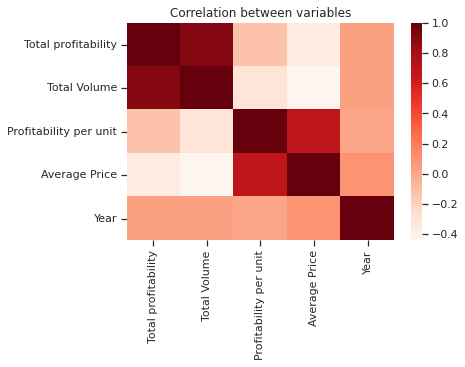

In [152]:
sns.heatmap(df_h2.corr(), cmap="Reds").set(title="Correlation between variables")

**COMPARING TOTAL PROFITABILITY:**

In order to compare the correlation between the variables we assemble a pairplot. 

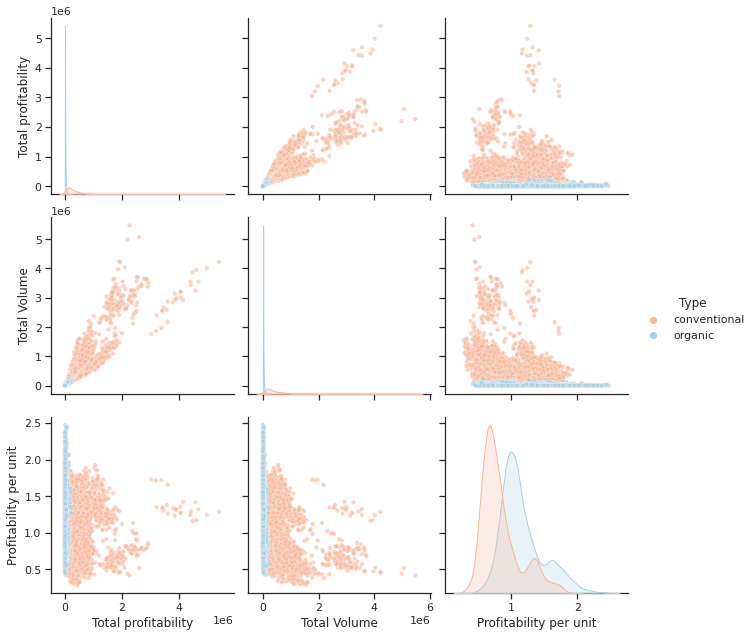

In [153]:
sns.set(style="ticks", color_codes=True)
df_plot2 = df_h2[["Total profitability","Total Volume", "Profitability per unit","Type"]] 
sns.pairplot(df_plot2, vars=df_plot2.columns[:-1], hue="Type", palette= "RdBu",plot_kws = {'alpha': 0.6, 's': 20}, height=3)

In the distribution graph of probability per unit (bottom right corner) we can see that prices for organic products are actually higher. However, there is a strong correlation between total volume and total profitability (top row, middle graph). Due to a larger volume of sales of non-organic products, total profitability is also greater. In comparison, the effect of profitability per unit is insignificant in total profitability and total volume. 

It is diffcult to look for correlations graphically if we follow a normal scale, as volume and profitability presents substantial differences in organic and non-organic products. So, for a better image of the scatterplots we are going to change the scale of the axis to a logarithm scale (sometimes to the y-axis or both).

Logarithmic scale allows a large range of data points to be displayed without the very small and/or large values, which are compressed at the two ends of the graph. In this scale, moving a unit of distance along the scale means the number has been multiplied by 10 (or some other fixed factor). 

Text(0.5, 0, 'Total Volume')

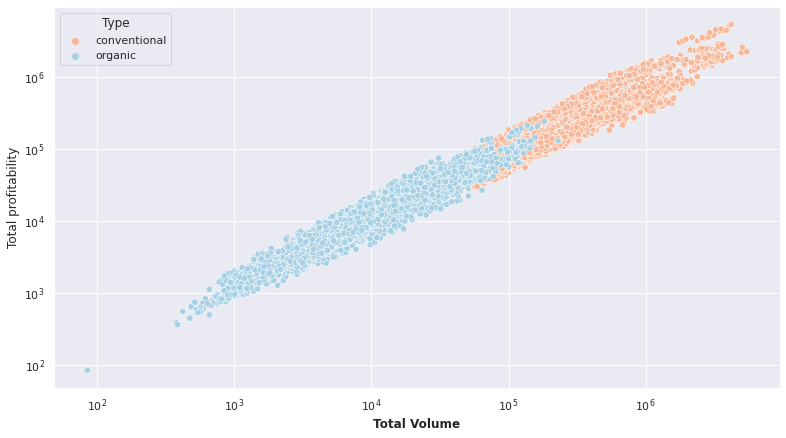

In [154]:
sns.set(rc={'figure.figsize':(13,7)})
p = sns.scatterplot(x = 'Total Volume', y = 'Total profitability', data = df_h2, hue ='Type', palette = 'RdBu', s=40)
p.set(yscale='log', xscale = 'log');
p.set_xlabel('Total Volume', fontsize = 12, fontweight='bold')

As we predicted before, the correlation between total volume and total profitability is in fact high. Plus, we can see how organic products have less volume of sales, and less total profitability. 

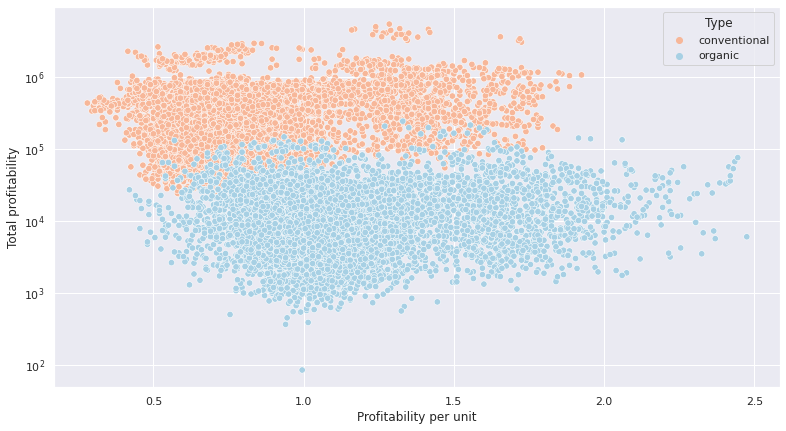

In [155]:
sns.scatterplot(x = 'Profitability per unit', y = 'Total profitability', data = df_h2, hue ='Type', palette = 'RdBu', s=40).set(yscale='log');

In the graph above, no correlation seems to appear between profitability per unit and total profitability in any of the types of mangos. Although, we can observe how for the same profitability per unit, total profitability in conventional is substansially greater (this can be explain by the total volume of conventional mangos).

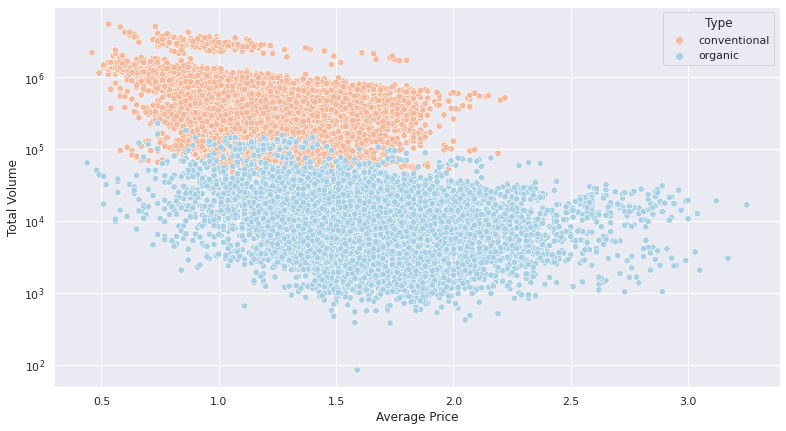

In [156]:
sns.scatterplot(x = 'Average Price', y = 'Total Volume', data = df_h2, hue ='Type', palette = 'RdBu', s=40).set(yscale='log');

Comparing average price and total volume we find a negative correlation. This makes sense as we generally buy more of cheaper products. This relationship can also be seen later on, when comparing average price and profitability per unit.

Furthermore, we have plotted the following lineplot in order to see whether total profitability has varied through the years:

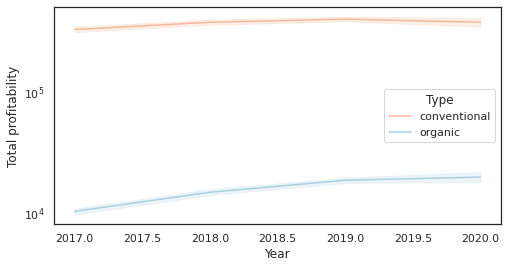

In [157]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set(style='white')
sns.lineplot(data=df_h2, x="Year", y="Total profitability", palette="RdBu", hue = 'Type').set(yscale='log');

In both types of products, total profitability has grown through the years. 

As we can see, total profitability has grown for non-organic products up to 2019, with a slight drop in 2020. While total profitability for organic products has grown consistently. 

We compare total profitability to volume in order to see they follow the same trend:


[None]

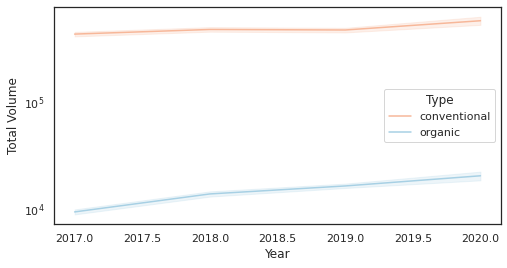

In [158]:
sns.lineplot(data=df_h2, x="Year", y="Total Volume", hue='Type',palette="RdBu").set(yscale = 'log') 

The trend is more or less the same, however, we do not see the same drop in volume from 2019 to 2020 in non-organic products. Hence, this must be due to a change in profitability per unit. 

In addition, we find the comparison of total profitability by type of product not very useful since it is clear that total profitability is higher for non-organic products, despite of trends through years or changes in profitability oer unit.

Thus, in order to reach a better conclusion regarding the comparison of profits between organic and non-organic products, we will assess the differences in profitability per unit. 

**COMPARING PROFITABILITY PER UNIT:**

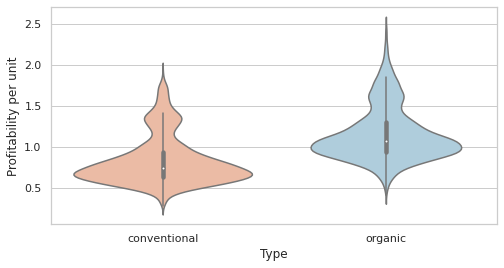

In [159]:
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="Type", y="Profitability per unit", palette = 'RdBu', data = df_h2)

The following histogram represents the distribution of the profitability per unit of each type of product:

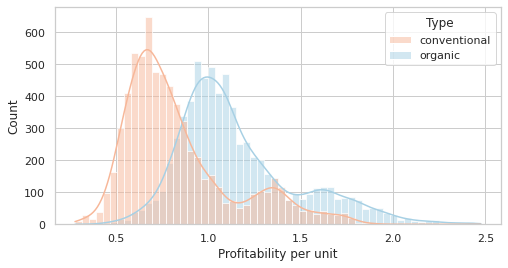

In [160]:
sns.histplot(data=df_h2, x="Profitability per unit", hue='Type', palette='RdBu',  kde=True);

We can see that the shapes are almost identical, but organic products have a higher profitability per unit: most organic products have profits per unit of around 1.15, while non-organic products have profits around 0.75 per unit.

We also compare the variability of profits per unit throughout the years, as we did for total profitability:

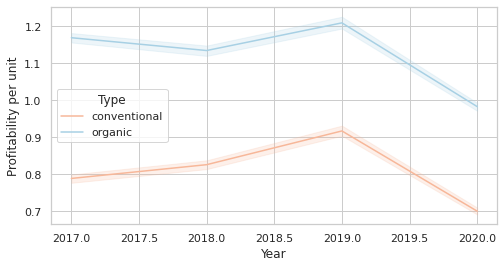

In [161]:
sns.lineplot(data=df_h2, x="Year", y= "Profitability per unit" , hue= 'Type', palette="RdBu");

Again, we see that the trend in both is very similar. It can be clearly seen that profits per unit are higher for organic products. 

The drop in total profitability in non-organic products in 2020 can be explained due to the correlation between total profitability and profitability per unit. 

We highlight that this drop in profitability per unit in 2020 also takes place in organic products, however, volume grew more for this type of product in this period - compensating the drop. 

Hence, although correlation between total profitability and total volume is higher, we can appreciate another (less significant) correlation between total profitability and profitability per unit. 

The change in profitability per unit and its ditstrubtion each year can also be seen in the following violin plot. In addition to the distribution of the types of products per year:

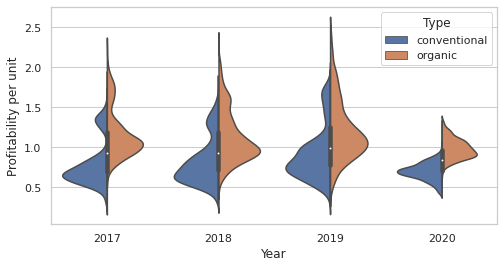

In [162]:
sns.violinplot(data=df_h2, x="Year", y="Profitability per unit", hue="Type", split=True)

Again, we can clearly see that organic´s profitability per unit is higher. The distributions are fairly similar, with similar deviations and variability patterns.

Lastly, we plot the relationship between profitability oer unit and average price:

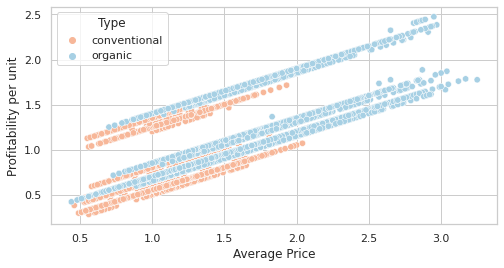

In [163]:
sns.scatterplot(x = 'Average Price', y = 'Profitability per unit', data = df_h2, hue ='Type', palette = 'RdBu', s=40);

As prices go up, profitability per unit also does however the total volume seems to go down (its reasonable as customers decide not buy the product if they consider the price is really high). Since organic products appear to have a higher average price, we can explain why total volume in organic products is lower and consequently its total profits. 

## **CONCLUSIONS**

After careful analysis, and taking into account the aforementioned points, we find that our second hypothesis: “The profits for the organic are greater than the non-organic", is somewhat true. 

In order to reach our conclusions we have taken into account both total profitability and profitability per unit, since each variable reflects profits at different stages of the accounting process. In order to assess their variability we take into account how total volume and average price affect these variables, as well as their progression through the years. 

Our main conclusions are as follows:

**Profits per unit are greater for organic products than non-organic**. This is due to higher average prices for organic products. However, higher average prices affects negatively total volume since consumers prefer cheaper products. Hence, the higher profitability per unit is indirectly causing a lower total profitability. 

As total volume of sales of non-organic products is much higher than those of organic ones, we find that **total profitability is higher for non-organic products**. 

Hence, the answer to the hypotehsis depends on which level you wish to analyse profits. In the day to day sales, we will find that selling one organic product is more beneficial than selling a non-organic product. However, in the long-run, it is more beneficial to have a higher availability of non-organic products since overall sales will be larger. 